# **Preparación del entorno**

### **Importations**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import re
import string

# Specific NLTK imports
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords

nltk.download('averaged_perceptron_tagger')

nltk.download('wordnet')

nltk.download('punkt_tab')

nltk.download('averaged_perceptron_tagger_eng')

# Scikit-learn imports
from sklearn.model_selection import train_test_split

# NLTK setup (only the first time)
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /home/ricardo965/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data] Downloading package wordnet to
[nltk_data]     /home/ricardo965/nltk_data...
[nltk_data] Downloading package punkt_tab to
[nltk_data]     /home/ricardo965/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.
[nltk_data] Downloading package averaged_perceptron_tagger_eng to
[nltk_data]     /home/ricardo965/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger_eng.zip.
[nltk_data] Downloading package punkt to /home/ricardo965/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to
[nltk_data]     /home/ricardo965/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

### **Load of Files**

In [2]:
# Load Data from Local 'data/raw' Directory

# Define the path to the text files
base_dir = '../data/raw/'
data_folder_name = 'sentiment labelled sentences'
raw_data_dir = os.path.join(base_dir, data_folder_name)

# List of files to load and their sources
files_to_load = {
    'amazon': 'amazon_cells_labelled.txt',
    'imdb': 'imdb_labelled.txt',
    'yelp': 'yelp_labelled.txt'
}

dataframes_list = []
print(f"Looking for files in: {raw_data_dir}")

for source_name, file_name in files_to_load.items():
    file_path = os.path.join(raw_data_dir, file_name)
    
    if os.path.exists(file_path):
        # Read the file, specifying the '\t' separator and column names
        df_source = pd.read_csv(file_path, sep='\t', header=None, names=['sentence', 'sentiment'])
        
        # Add a 'source' column to know where the data came from
        df_source['source'] = source_name
        
        dataframes_list.append(df_source)
        print(f"  - '{file_name}' loaded successfully ({len(df_source)} rows).")
    else:
        print(f"  - WARNING: File '{file_name}' not found in '{raw_data_dir}'")

# Create the combined DataFrame
if dataframes_list:
    df = pd.concat(dataframes_list, ignore_index=True)
    print("\nCombined DataFrame created!")
    
    # Initial data view
    print("\n First 5 rows of the DataFrame:")
    print(df.head())
    
    print("\n General DataFrame information:")
    df.info()
else:
    print("\n No data was loaded. Check the paths.")

Looking for files in: ../data/raw/sentiment labelled sentences
  - 'amazon_cells_labelled.txt' loaded successfully (1000 rows).
  - 'imdb_labelled.txt' loaded successfully (748 rows).
  - 'yelp_labelled.txt' loaded successfully (1000 rows).

Combined DataFrame created!

 First 5 rows of the DataFrame:
                                            sentence  sentiment  source
0  So there is no way for me to plug it in here i...          0  amazon
1                        Good case, Excellent value.          1  amazon
2                             Great for the jawbone.          1  amazon
3  Tied to charger for conversations lasting more...          0  amazon
4                                  The mic is great.          1  amazon

 General DataFrame information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2748 entries, 0 to 2747
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   sentence   2748 non-null   object
 1   sent

### **Unifiying into a single Dataset**

In [3]:
base_dir = '../data/raw/'
data_folder_name = 'sentiment labelled sentences' 
raw_data_dir = os.path.join(base_dir, data_folder_name)


files_to_load = {
    'amazon': 'amazon_cells_labelled.txt',
    'imdb': 'imdb_labelled.txt',
    'yelp': 'yelp_labelled.txt'
}

# Load and combine the files
dataframes_list = []

print(f"Looking for files in: {raw_data_dir}")
for source_name, file_name in files_to_load.items():
    file_path = os.path.join(raw_data_dir, file_name)

    if os.path.exists(file_path):
        # We read the file, specifying the '\t' separator and column names
        df_source = pd.read_csv(file_path, sep='\t', header=None, names=['sentence', 'sentiment'])

        # We add a 'source' column to know where the data came from
        df_source['source'] = source_name

        dataframes_list.append(df_source)
        print(f"   - '{file_name}' loaded successfully ({len(df_source)} rows).")
    else:
        print(f"   - WARNING: File '{file_name}' not found in '{raw_data_dir}'")

# Create the combined DataFrame
if dataframes_list:
    df = pd.concat(dataframes_list, ignore_index=True)
    print("\nCombined DataFrame created!")

    # Initial data view
    print("\n First 5 rows of the DataFrame:")
    print(df.head())

    print("\n General DataFrame information:")
    df.info()

    print("\n Sentiment distribution (0=Neg, 1=Pos):")
    print(df['sentiment'].value_counts())

    print("\n Distribution by source:")
    print(df['source'].value_counts())
else:
    print("\n No data was loaded. Check the paths.")

Looking for files in: ../data/raw/sentiment labelled sentences
   - 'amazon_cells_labelled.txt' loaded successfully (1000 rows).
   - 'imdb_labelled.txt' loaded successfully (748 rows).
   - 'yelp_labelled.txt' loaded successfully (1000 rows).

Combined DataFrame created!

 First 5 rows of the DataFrame:
                                            sentence  sentiment  source
0  So there is no way for me to plug it in here i...          0  amazon
1                        Good case, Excellent value.          1  amazon
2                             Great for the jawbone.          1  amazon
3  Tied to charger for conversations lasting more...          0  amazon
4                                  The mic is great.          1  amazon

 General DataFrame information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2748 entries, 0 to 2747
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   sentence   2748 non-null   object
 1   s

# **EDA**

### **Cleaning nulls and duplicates**

In [4]:
# Basic Cleaning: Nulls and Duplicates

print(" Checking for Null Values ")
# This counts how many null (empty) values there are in EACH column
null_counts = df.isnull().sum()
print(null_counts)

# Quick check
if null_counts.sum() == 0:
    print("\n No null values found.")
else:
    print("\n Null values found.")

print("\n Checking for Duplicates ")
# This counts how many ENTIRE ROWS are duplicated
total_duplicates = df.duplicated().sum()

print(f"Number of exactly duplicated rows: {total_duplicates}")

# view duplicates if they exist
if total_duplicates > 0:
    print("\nShowing the duplicated rows:")
    # Shows the rows that are duplicates
    print(df[df.duplicated(keep='first')])
else:
    print("\n No duplicated rows found.")

 Checking for Null Values 
sentence     0
sentiment    0
source       0
dtype: int64

 No null values found.

 Checking for Duplicates 
Number of exactly duplicated rows: 17

Showing the duplicated rows:
                                               sentence  sentiment  source
285                                       Great phone!.          1  amazon
407                                        Works great.          1  amazon
524                                       Works great!.          1  amazon
543                             Don't buy this product.          0  amazon
744   If you like a loud buzzing to override all you...          0  amazon
748                                       Does not fit.          0  amazon
778                               This is a great deal.          1  amazon
792                                        Great Phone.          1  amazon
892                    Excellent product for the price.          1  amazon
896                                        Gre

In [7]:
print(f"Original number of rows: {len(df)}")

# Remove duplicate rows
# We keep the first occurrence ('keep="first"') and remove the rest.
df = df.drop_duplicates()

# Verification
print(f"Number of rows after removing duplicates: {len(df)}")

new_duplicates = df.duplicated().sum()
print(f"Remaining number of duplicates: {new_duplicates}")

if new_duplicates == 0:
    print("All duplicates have been removed.")

Original number of rows: 2748
Number of rows after removing duplicates: 2731
Remaining number of duplicates: 0
All duplicates have been removed.


### **Univariate Analysis**

**Class Balance**


 Class Balance Analysis 
sentiment
1    1376
0    1355
Name: count, dtype: int64


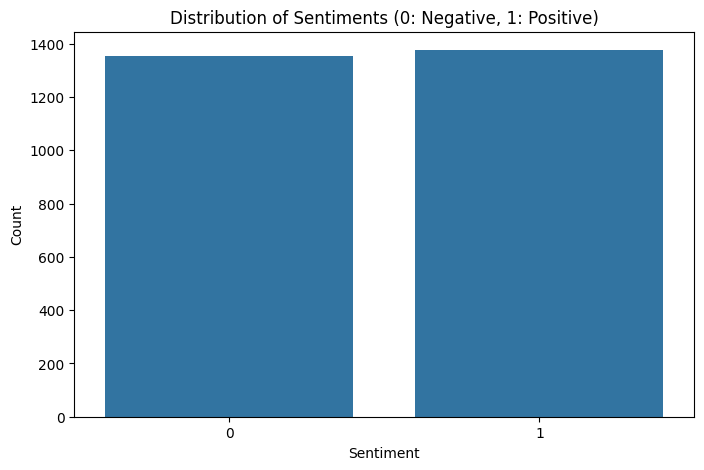

In [8]:
# Analysis of 'sentiment', class balance

print("\n Class Balance Analysis ")
print(df['sentiment'].value_counts())

# Plot
plt.figure(figsize=(8, 5))
sns.countplot(x='sentiment', data=df)
plt.title('Distribution of Sentiments (0: Negative, 1: Positive)')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.show()

**Distribution of sentence length**


 Sentence Length Statistics (by word) 
count    2731.000000
mean       13.062248
std        35.922696
min         1.000000
25%         6.000000
50%        10.000000
75%        16.000000
max      1390.000000
Name: sentence_length, dtype: float64


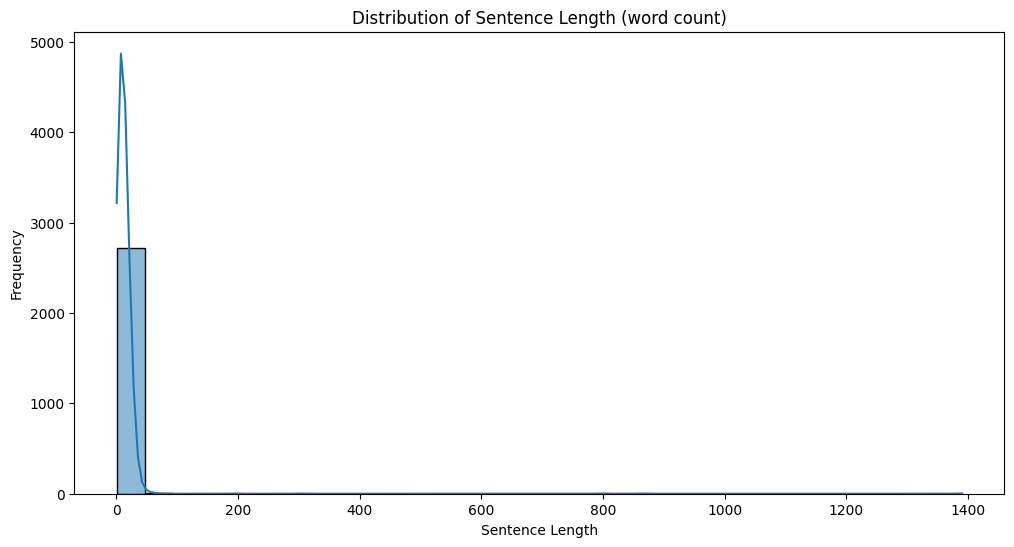

In [9]:
# Length Distribution Analysis

# We create the 'sentence_length' column by counting words
# We use .split() to count words, not characters
df['sentence_length'] = df['sentence'].apply(lambda x: len(x.split()))

print("\n Sentence Length Statistics (by word) ")
# We look at the mean, min, max
print(df['sentence_length'].describe())

# Plot
plt.figure(figsize=(12, 6))
sns.histplot(df['sentence_length'], bins=30, kde=True)
plt.title('Distribution of Sentence Length (word count)')
plt.xlabel('Sentence Length')
plt.ylabel('Frequency')
plt.show()

**Results:**

<br>

**Class Balance:** With 1376 positives and 1355 negatives, the dataset is almost perfectly balanced (50.4% vs 49.6%). This is ideal for training.

<br>

**Length Distribution:** The histogram looks "flattened" to the left because there is an extreme outlier. 75% of the sentences have 16 words or less. But the maximum sentence has 1390 words; this single 1390-word sentence is distorting the entire plot and the statistics.

<br>

We will investigate the outliers in depth in the next step.

### **Identification of Outliers**


 Outlier Visualization (Boxplot) 


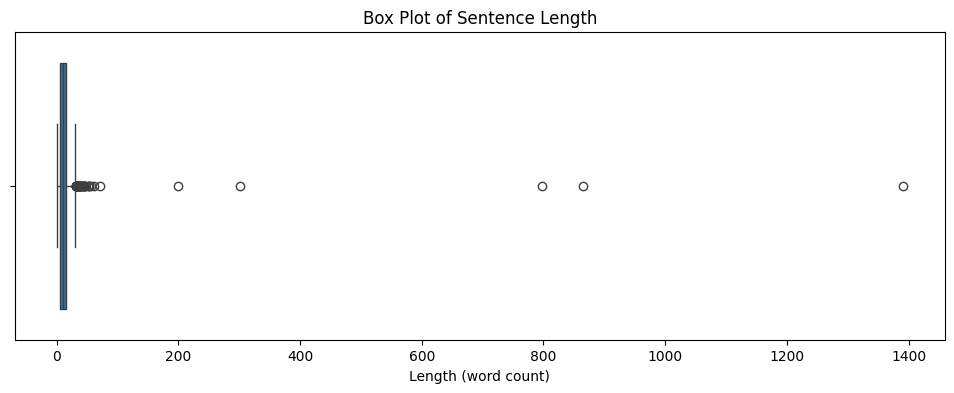


 Sentences with more than 100 words (Outliers) 
Number of sentences with more than 100 words: 5
                                               sentence  sentence_length  \
1019   The structure of this film is easily the most...              865   
1135  You'll love it!  \t1\nThis movie is BAD.  \t0\...              199   
1136   In fact, it's hard to remember that the part ...             1390   
1149   I love it.  \t1\nThe ending is so, SO perfect...              302   
1646   With great sound effects, and impressive spec...              797   

      sentiment  
1019          0  
1135          1  
1136          0  
1149          0  
1646          1  

 The longest sentence in the dataset (the main outlier) 
                                               sentence  sentence_length  \
1136   In fact, it's hard to remember that the part ...             1390   

      sentiment  
1136          0  


In [10]:
# Outlier Identification with Boxplot

print("\n Outlier Visualization (Boxplot) ")
plt.figure(figsize=(12, 4))
sns.boxplot(x=df['sentence_length'])
plt.title('Box Plot of Sentence Length')
plt.xlabel('Length (word count)')
plt.show()

# Outlier Investigation

# Let's see what those long sentences are
print("\n Sentences with more than 100 words (Outliers) ")
long_sentences = df[df['sentence_length'] > 100]
print(f"Number of sentences with more than 100 words: {len(long_sentences)}")

# We print the details of those sentences
if not long_sentences.empty:
    print(long_sentences[['sentence', 'sentence_length', 'sentiment']])

# Let's see the longest sentence
max_length_sentence = df[df['sentence_length'] == df['sentence_length'].max()]
print("\n The longest sentence in the dataset (the main outlier) ")
print(max_length_sentence[['sentence', 'sentence_length', 'sentiment']])

**Outlier and Data Artifact Removal**

The analysis of the **sentence\_length** outliers allowed us to identify 5 rows with atypically high lengths (from 199 to 1390 words), which were distorting the descriptive statistics and visualizations.

A manual inspection of these rows revealed that they are not genuine long sentences, but rather **corrupt data artifacts**. These entries contained multiple observations (sentences and their respective sentiment *labels*, e.g., `\t1` and `\t0`) concatenated into a single cell, likely as a result of a *parsing* error from the source file.

Given that these rows do not represent a valid individual observation and compromise the integrity of the dataset, we proceed with their removal. This cleaning is fundamental to avoid biasing the statistical analysis and, subsequently, the model training with noisy and incorrect data.

Rows before removing corrupt outliers: 2731
Rows after removing corrupt outliers: 2726

 Verification: Statistics after cleaning 
count    2726.000000
mean       11.782832
std         7.759396
min         1.000000
25%         6.000000
50%        10.000000
75%        16.000000
max        71.000000
Name: sentence_length, dtype: float64

 Verification: Histogram after cleaning 


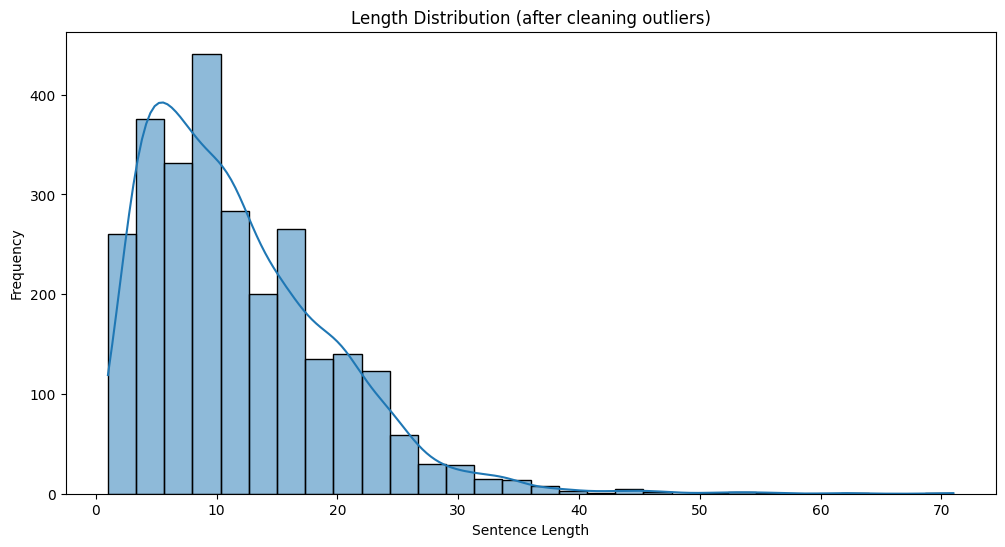


 Verification: Boxplot after cleaning 


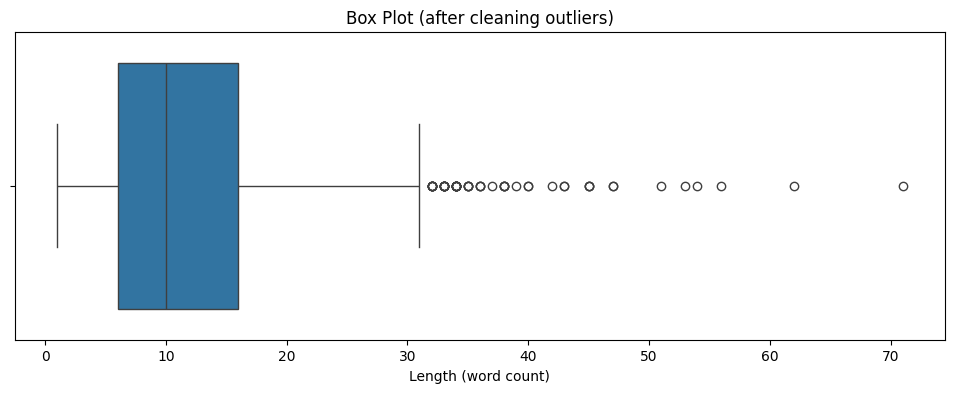

In [11]:
# We remove corrupt outliers

print(f"Rows before removing corrupt outliers: {len(df)}")

# We define the cleaning threshold based on the analysis; we will define it as 100 words
long_threshold = 100

# We remove the rows where the length is greater than the threshold
df = df[df['sentence_length'] <= long_threshold]

print(f"Rows after removing corrupt outliers: {len(df)}")

# We verify by plotting the distribution again

print("\n Verification: Statistics after cleaning ")
print(df['sentence_length'].describe())

print("\n Verification: Histogram after cleaning ")
plt.figure(figsize=(12, 6))
sns.histplot(df['sentence_length'], bins=30, kde=True)
plt.title('Length Distribution (after cleaning outliers)')
plt.xlabel('Sentence Length')
plt.ylabel('Frequency')
plt.show()

print("\n Verification: Boxplot after cleaning ")
plt.figure(figsize=(12, 4))
sns.boxplot(x=df['sentence_length'])
plt.title('Box Plot (after cleaning outliers)')
plt.xlabel('Length (word count)')
plt.show()

**Results**

<br>

**Statistics:** The most important change is in the standard deviation (std) and the max.

The std dropped drastically from 35.9 to 7.7, which tells us that our sentences now have a much more consistent length.

The max is now 71 words, a reasonable value for a review.

<br>

**Visualizations:** Both plots now give us a clear picture of the distribution: the vast majority of sentences have fewer than 30 words.

The "outliers" seen now are not errors; they are naturally long sentences and should be kept in the dataset.

### **multivariate analysis**

Now that our data is clean and we understand each variable separately, we can move on to multivariate analysis. This is where we cross-reference variables to find relationships:

<br>

Does the sentence length (**sentence\_length**) depend on the sentiment (**sentiment**)?

<br>

Are positive reviews longer or shorter than negative ones?

<br>

Is the class balance (**sentiment**) maintained across each source (**source**)?


 Analysis: Sentence Length vs. Sentiment 


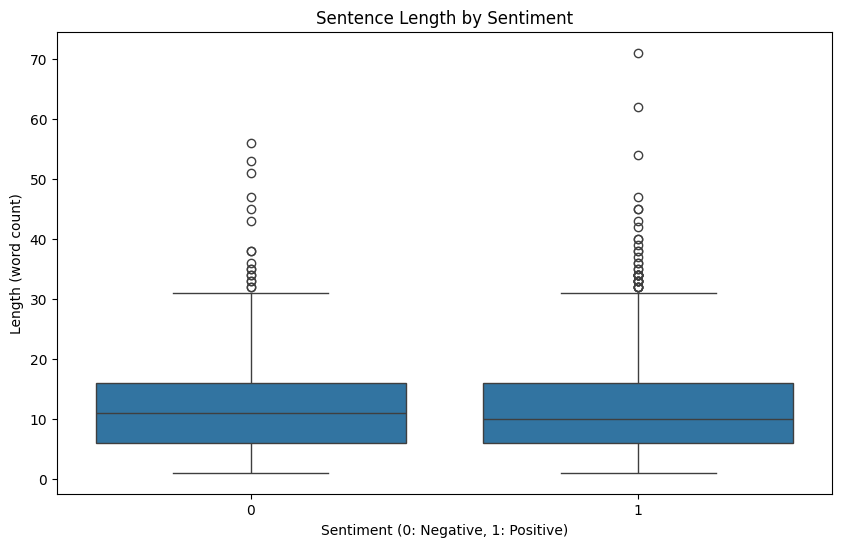

sentiment
0    11.815089
1    11.751092
Name: sentence_length, dtype: float64

 Analysis: Class Balance by Source 


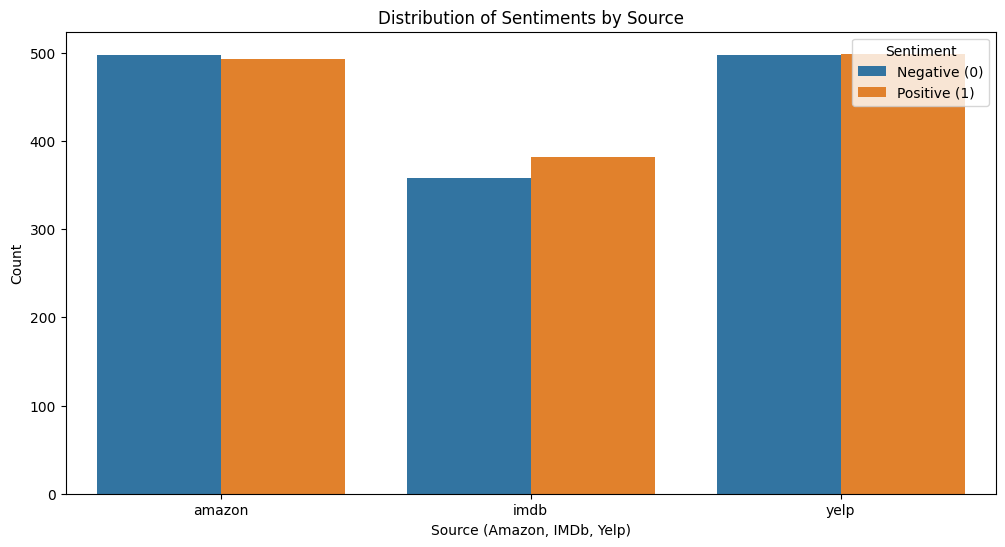

In [12]:
# Relationship sentence_length vs. sentiment

print("\n Analysis: Sentence Length vs. Sentiment ")
plt.figure(figsize=(10, 6))

# We use a Boxplot to compare the two distributions
sns.boxplot(x='sentiment', y='sentence_length', data=df)
plt.title('Sentence Length by Sentiment')
plt.xlabel('Sentiment (0: Negative, 1: Positive)')
plt.ylabel('Length (word count)')
plt.show()

# See the exact means
print(df.groupby('sentiment')['sentence_length'].mean())


# Relationship source vs. sentiment

print("\n Analysis: Class Balance by Source ")
plt.figure(figsize=(12, 6))
# We use a countplot with 'hue' to group by sentiment
sns.countplot(x='source', hue='sentiment', data=df)
plt.title('Distribution of Sentiments by Source')
plt.xlabel('Source (Amazon, IMDb, Yelp)')
plt.ylabel('Count')
plt.legend(title='Sentiment', loc='upper right', labels=['Negative (0)', 'Positive (1)'])
plt.show()

**Results**

<br>

**Length vs. Sentiment:**

<br>

**Observation:** The two boxes (for 0 and 1) are almost identical. Their medians, interquartile ranges, and the location of outliers are very similar.

**Means:** The numbers confirm it. The mean length of negative sentences (11.81) is practically a match to that of positive ones (11.75).

**Conclusion:** Sentence length, by itself, does not seem to be a useful feature for predicting sentiment.

<br>

**Class Balance by Source:**

<br>

**Observation:** We see that the class balance (half positive, half negative) holds very well *within* each of the three sources: amazon, imdb, and yelp.

**Conclusion:** This means the dataset is not only balanced overall, but each individual source is balanced as well.

## **Save dataset**

In [14]:
# This DataFrame (df) has been cleaned of nulls, duplicates, 
# and corrupt outliers during the EDA process.

output_dir = '../data/processed/'
output_file_path = os.path.join(output_dir, 'cleaned_data.csv')

# Ensure the 'processed' directory exists
os.makedirs(output_dir, exist_ok=True)

try:
    # Save the cleaned DataFrame
    # index=False prevents pandas from saving the row index as a column
    df.to_csv(output_file_path, index=False)
    
    print(f"\nCleaned DataFrame saved successfully to: {output_file_path}")
    print(f"Total rows saved: {len(df)}")
    print("Columns in saved file:", df.columns.tolist())

except Exception as e:
    print(f"\nError while saving the file: {e}")


Cleaned DataFrame saved successfully to: ../data/processed/cleaned_data.csv
Total rows saved: 2726
Columns in saved file: ['sentence', 'sentiment', 'source', 'sentence_length']
